In [1]:
import pandas as pd

In [2]:
reviews_df = pd.read_csv("Hotel_Reviews.csv")

In [3]:
reviews_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [4]:
reviews_df["review"] = reviews_df["Negative_Review"] + reviews_df["Positive_Review"]


In [5]:
reviews_df["is_bad_review"] = reviews_df["Reviewer_Score"].apply(lambda x: 1 if x < 5 else 0)

In [6]:
reviews_df = reviews_df[["review", "is_bad_review"]]
reviews_df.head()

,review,is_bad_review
0,I am so angry that i made this post available...,1
1,No Negative No real complaints the hotel was g...,0
2,Rooms are nice but for elderly a bit difficul...,0
3,My room was dirty and I was afraid to walk ba...,1
4,You When I booked with your company on line y...,0


In [7]:
reviews_df = reviews_df.sample(frac = 0.1, replace = False, random_state=42)

In [8]:
reviews_df["review"] = reviews_df["review"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))

In [9]:
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mishal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mishal\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [10]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mishal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
import nltk
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mishal\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [12]:
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    text = text.lower()
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    text = [word for word in text if not any(c.isdigit() for c in word)]
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    text = [t for t in text if len(t) > 0]
    pos_tags = pos_tag(text)
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    text = [t for t in text if len(t) > 1]
    text = " ".join(text)
    return(text)


reviews_df["review_clean"] = reviews_df["review"].apply(lambda x: clean_text(x))


In [13]:
import nltk
nltk.data.path.append('your_nltk_data_path')
nltk.download('vader_lexicon')



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mishal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
reviews_df["sentiments"] = reviews_df["review"].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)

In [15]:
reviews_df["nb_chars"] = reviews_df["review"].apply(lambda x: len(x))

# add number of words column
reviews_df["nb_words"] = reviews_df["review"].apply(lambda x: len(x.split(" ")))

In [16]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [17]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(reviews_df["review_clean"].apply(lambda x: x.split(" ")))]

In [18]:
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)


In [19]:
doc2vec_df = reviews_df["review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
reviews_df = pd.concat([reviews_df, doc2vec_df], axis=1)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Create the TF-IDF vectorizer
tfidf = TfidfVectorizer(min_df=10)

# Fit and transform the text data
tfidf_result = tfidf.fit_transform(reviews_df["review_clean"]).toarray()

# Get the feature names
feature_names = tfidf.get_feature_names_out()

# Create a DataFrame with TF-IDF values and feature names
tfidf_df = pd.DataFrame(tfidf_result, columns=feature_names)

# Rename columns with a prefix, if needed
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]

# Set the index
tfidf_df.index = reviews_df.index

# Now you have a DataFrame with TF-IDF values and feature names


In [21]:
reviews_df.head()

,review,is_bad_review,review_clean,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
488440,Would have appreciated a shop in the hotel th...,0,would appreciate shop hotel sell drinking wate...,0.049,0.617,0.334,0.9924,599,113,-0.129529,0.310654,-0.238522,-0.158210,-0.194286
274649,No tissue paper box was present at the room,0,tissue paper box present room,0.216,0.784,0.000,-0.2960,44,10,-0.008017,0.193824,0.165839,-0.153701,-0.107658
374688,Pillows Nice welcoming and service,0,pillow nice welcome service,0.000,0.345,0.655,0.6908,36,7,-0.070281,0.186280,0.030248,-0.064266,-0.057739
404352,Everything including the nice upgrade The Hot...,0,everything include nice upgrade hotel revamp s...,0.000,0.621,0.379,0.9153,155,27,-0.051590,0.175261,0.065273,-0.078445,0.024898
451596,Lovely hotel v welcoming staff,0,lovely hotel welcome staff,0.000,0.230,0.770,0.7717,32,7,0.054085,0.076730,0.098138,-0.196369,-0.060556


In [22]:
reviews_df.shape

(51574, 14)

In [23]:
reviews_df["is_bad_review"].value_counts(normalize = True)

0    0.956761
1    0.043239
Name: is_bad_review, dtype: float64

In [24]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


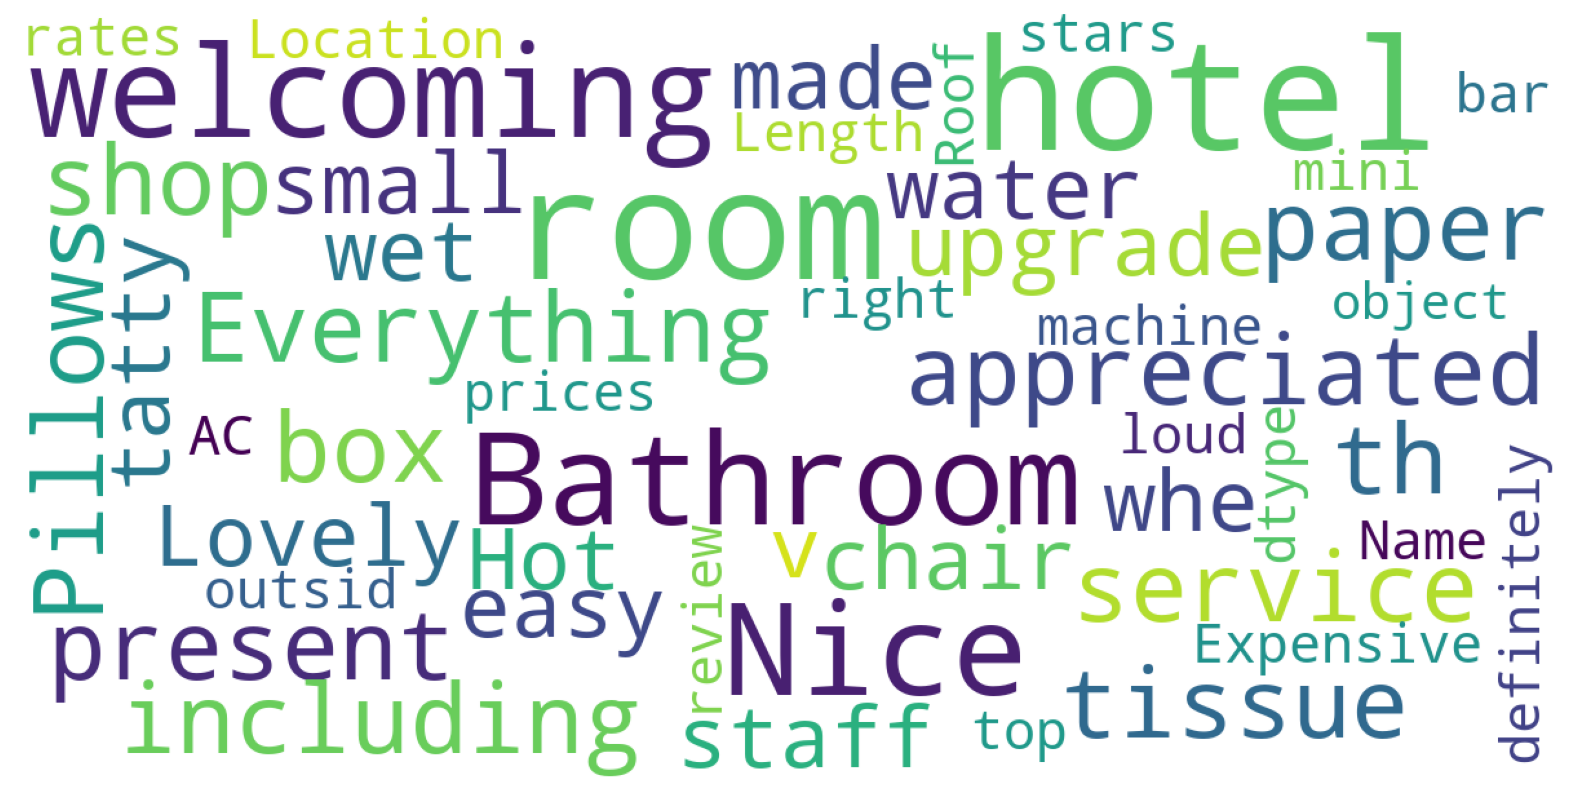

In [25]:


from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(reviews_df["review"])




In [26]:
reviews_df[reviews_df["nb_words"] >= 5].sort_values("pos", ascending = False)[["review", "pos"]].head(10)

,review,pos
43101,A perfect location comfortable great value,0.931
211742,Clean comfortable lovely staff,0.907
175551,Friendly welcome Comfortable room,0.905
365085,Good location great value,0.904
109564,Clean friendly and comfortable,0.902
145743,Good value amazing location,0.901
407590,breakfast excellent Clean comfort,0.899
407546,Great place I enjoyed,0.881
218571,Beautiful Quirky Comfortable,0.878
436901,Lovely comfortable rooms,0.877


In [27]:
reviews_df[reviews_df["nb_words"] >= 5].sort_values("neg", ascending = False)[["review", "neg"]].head(10)

,review,neg
193086,No dislikes LOCATION,0.831
356368,Nothing Great helpful wonderful staff,0.812
318516,A disaster Nothing,0.804
458794,Nothing Excellent friendly helpful staff,0.799
29666,A bit noisy No,0.796
426057,Dirty hotel Smells bad,0.762
263187,Very bad service No,0.758
443796,Nothing perfect,0.750
181508,Window blind was broken,0.744
175316,Nothing Super friendly staff,0.743


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


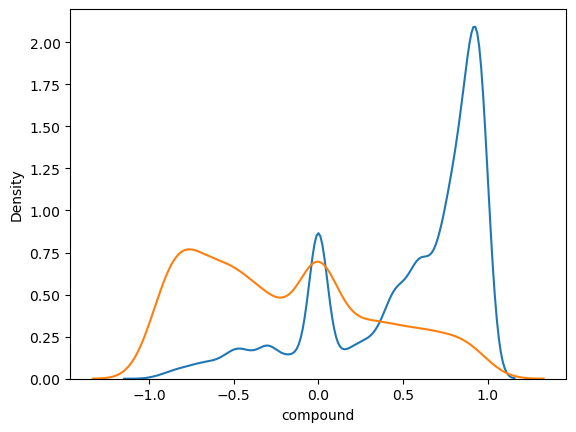

In [28]:
import seaborn as sns

for x in [0, 1]:
    subset = reviews_df[reviews_df['is_bad_review'] == x]
    
    # Draw the density plot
    if x == 0:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['compound'], hist = False, label = label)

In [29]:
from sklearn.svm import SVC

In [30]:
label = "is_bad_review"
ignore_cols = [label, "review", "review_clean"]
features = [c for c in reviews_df.columns if c not in ignore_cols]

# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reviews_df[features], reviews_df[label], test_size = 0.20, random_state = 42)


In [36]:
from sklearn.metrics import accuracy_score

In [42]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [43]:
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

,feature,importance
3,compound,0.142954
6,doc2vec_vector_0,0.102311
8,doc2vec_vector_2,0.099570
10,doc2vec_vector_4,0.097488
9,doc2vec_vector_3,0.094185
7,doc2vec_vector_1,0.093040
4,nb_chars,0.087309
2,pos,0.076010
0,neg,0.070560
1,neu,0.070291


In [46]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy of Random Forest Classifier:",accuracy_score(y_test, y_pred_rf))
print(classification_report(y_pred_rf,y_test))

Accuracy of Random Forest Classifier: 0.9565681047018905
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     10260
           1       0.06      0.53      0.11        55

    accuracy                           0.96     10315
   macro avg       0.53      0.74      0.55     10315
weighted avg       0.99      0.96      0.97     10315



In [49]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions using Random Forest
y_pred_rf = rf.predict(X_test)

# Calculate and print the accuracy score for Random Forest
print("Accuracy of Random Forest Classifier:", accuracy_score(y_test, y_pred_rf))

# Print the classification report for Random Forest
print("Classification Report for Random Forest Classifier:\n", classification_report(y_test, y_pred_rf))

# Create an SVM classifier instance
svc = SVC()

# Fit the SVM classifier on your training data
svc.fit(X_train, y_train)

# Make predictions using SVM
y_pred_svm = svc.predict(X_test)

# Calculate and print the accuracy score for SVM
print("Accuracy of SVM Classifier:", accuracy_score(y_test, y_pred_svm))

# Print the classification report for SVM
print("Classification Report for SVM Classifier:\n", classification_report(y_test, y_pred_svm))


Accuracy of Random Forest Classifier: 0.9565681047018905
Classification Report for Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      9864
           1       0.53      0.06      0.11       451

    accuracy                           0.96     10315
   macro avg       0.74      0.53      0.55     10315
weighted avg       0.94      0.96      0.94     10315

Accuracy of SVM Classifier: 0.9562772661173049
Classification Report for SVM Classifier:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      9864
           1       0.00      0.00      0.00       451

    accuracy                           0.96     10315
   macro avg       0.48      0.50      0.49     10315
weighted avg       0.91      0.96      0.93     10315



C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of Random Forest Classifier: 0.9565681047018905
Classification Report for Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      9864
           1       0.53      0.06      0.11       451

    accuracy                           0.96     10315
   macro avg       0.74      0.53      0.55     10315
weighted avg       0.94      0.96      0.94     10315

Accuracy of SVM Classifier: 0.9562772661173049
Classification Report for SVM Classifier:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      9864
           1       0.00      0.00      0.00       451

    accuracy                           0.96     10315
   macro avg       0.48      0.50      0.49     10315
weighted avg       0.91      0.96      0.93     10315



C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


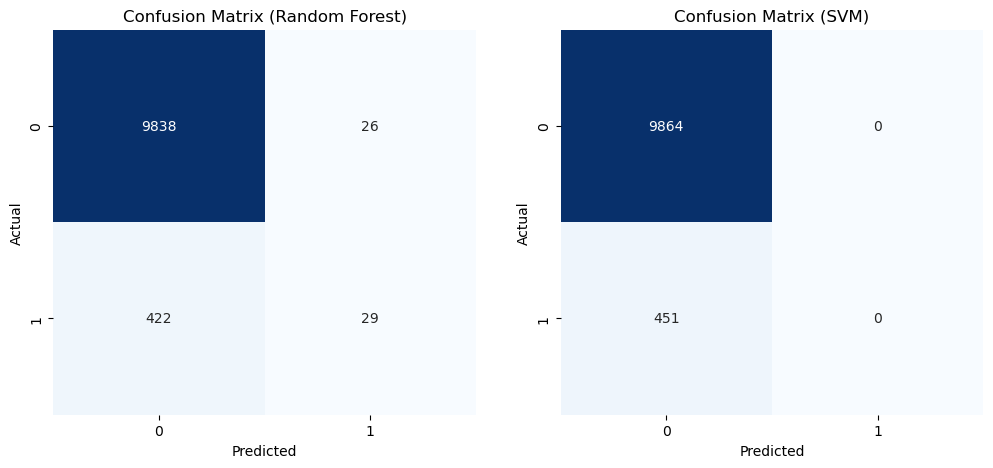

Random Forest Classifier performs better.


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions using Random Forest
y_pred_rf = rf.predict(X_test)

# Calculate and print the accuracy score for Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forest Classifier:", rf_accuracy)

# Print the classification report for Random Forest
print("Classification Report for Random Forest Classifier:\n", classification_report(y_test, y_pred_rf))

# Calculate the confusion matrix for Random Forest
confusion_rf = confusion_matrix(y_test, y_pred_rf)

# Initialize and train the SVM classifier
svc = SVC()
svc.fit(X_train, y_train)

# Make predictions using SVM
y_pred_svm = svc.predict(X_test)

# Calculate and print the accuracy score for SVM
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy of SVM Classifier:", svm_accuracy)

# Print the classification report for SVM
print("Classification Report for SVM Classifier:\n", classification_report(y_test, y_pred_svm))

# Calculate the confusion matrix for SVM
confusion_svm = confusion_matrix(y_test, y_pred_svm)

# Compare the classifiers by plotting confusion matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SVM)')

plt.show()

# Compare the accuracy of the classifiers
if rf_accuracy > svm_accuracy:
    print("Random Forest Classifier performs better.")
elif svm_accuracy > rf_accuracy:
    print("SVM Classifier performs better.")
else:
    print("Both classifiers have the same accuracy.")


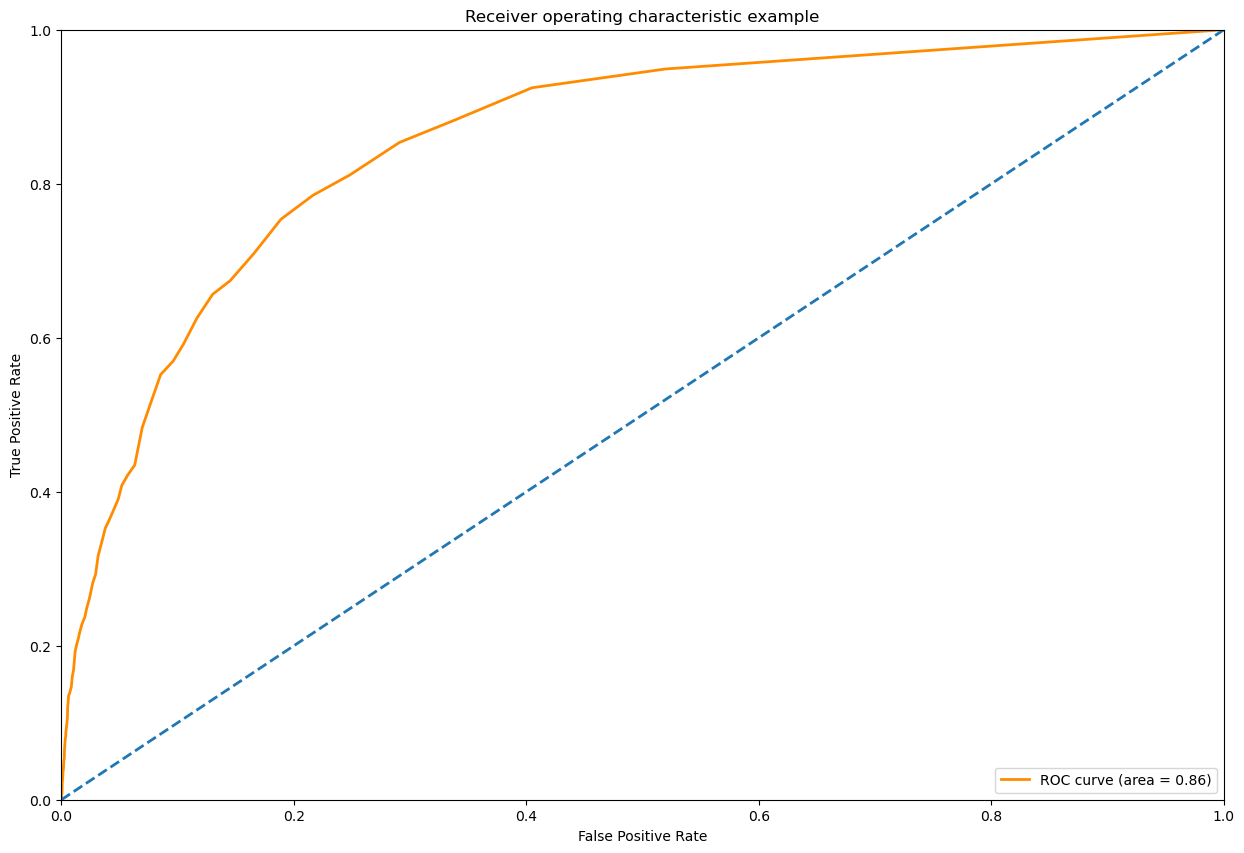

In [41]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [47]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


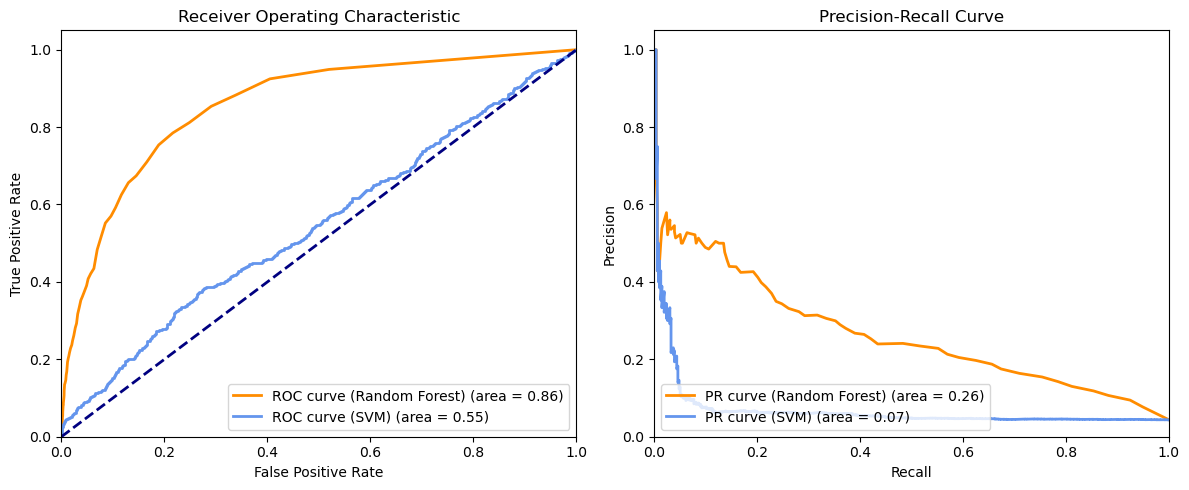

In [51]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Calculate ROC curve and ROC AUC for Random Forest
y_prob_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Calculate ROC curve and ROC AUC for SVM
y_prob_svm = svc.decision_function(X_test)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Calculate precision-recall curve and AUC for Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf)
pr_auc_rf = average_precision_score(y_test, y_prob_rf)

# Calculate precision-recall curve and AUC for SVM
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_prob_svm)
pr_auc_svm = average_precision_score(y_test, y_prob_svm)

# Create ROC curve and Precision-Recall curve plots
plt.figure(figsize=(12, 5))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (Random Forest) (area = %0.2f)' % roc_auc_rf)
plt.plot(fpr_svm, tpr_svm, color='cornflowerblue', lw=2, label='ROC curve (SVM) (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall_rf, precision_rf, color='darkorange', lw=2, label='PR curve (Random Forest) (area = %0.2f)' % pr_auc_rf)
plt.plot(recall_svm, precision_svm, color='cornflowerblue', lw=2, label='PR curve (SVM) (area = %0.2f)' % pr_auc_svm)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

